In [158]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.optimize import minimize



In [159]:
df = pd.read_csv('quality_test.csv')
df.head()


,0.051267,0.69956,1.0
0,-0.092742,0.68494,1.0
1,-0.213710,0.69225,1.0
2,-0.375000,0.50219,1.0
3,-0.513250,0.46564,1.0
4,-0.524770,0.20980,1.0


In [160]:
def f(x):
  ps = [2, 3, 4, 5, 6, 7]
  ls = []
  for cnt in range(6):
    for p in range(ps[cnt]):
      ls.append( np.power(x[1], p) * np.power(x[0], ps[cnt]-p-1) )
  
  return np.array(ls)

In [161]:
x = df.iloc[:, 0:2].to_numpy().astype('float')
y = df.iloc[:, 2].to_numpy().astype('float')

trues = df.loc[df.iloc[:, 2] == 1].iloc[:, 0:2].to_numpy().astype('float')
falses = df.loc[df.iloc[:, 2] == 0].iloc[:, 0:2].to_numpy().astype('float')



x = np.apply_along_axis(f, 1, x)
print(x.shape)

x = np.hstack((x, np.ones((x.shape[0], 1))))
print(x.shape)

(117, 27)
(117, 28)


In [162]:
def h(x, w):
  return 1 / (1 + np.exp(-x.dot(w)))



In [163]:
def cost_fun(w, x, y, l):
  sig = 1 / (1 + np.exp(-x.dot(w)))
  c = -(y*np.log(sig) + (1-y)*np.log(1-sig)) + l*w.T.dot(w)
  return c.mean()




In [164]:
w = np.random.normal(0, 0.01, size=(x.shape[1],))
l = 0.0001

res = minimize(cost_fun, w, args=(x,y , l))

w = res.x
print(w)
preds = h(x, w)
preds = 1*(preds >= 0.5)


acc = accuracy_score(y, preds)
print(acc)

[ 2.09309556  3.99458471 -4.89890116 -5.46682351 -5.82127503  1.54033464
 -0.78187474  0.86981775 -1.51815643 -4.09341878  2.00497223 -2.79489997
 -1.8706587  -4.38458249 -1.21438647 -0.56552723  2.73902497 -2.42149551
 -2.59894993  1.35225731 -4.22507606  0.84664211 -0.91128076  1.68359179
 -2.65020922 -2.23276915 -0.31806686  3.44118054]
0.8376068376068376


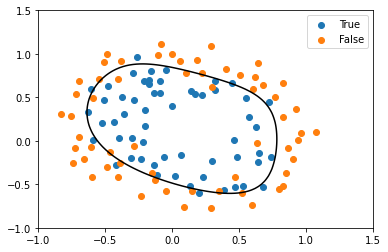

In [167]:
xs = np.linspace(-1, 1.5, 100)
ys = np.linspace(-1, 1.5, 100)



pln_x, pln_y = np.meshgrid(xs, ys)
pln_x = pln_x.ravel()[:, np.newaxis]
pln_y = pln_y.ravel()[:, np.newaxis]

pln = np.hstack((pln_x, pln_y))

pln_mul = np.apply_along_axis(f, 1, pln)

pln_mul = np.hstack((pln_mul, np.ones((pln_mul.shape[0], 1))))

z = h(pln_mul, w)
pln_x = pln_x.reshape(100, 100)
pln_y = pln_y.reshape(100, 100)

z = z.reshape(100, 100)


fig, ax = plt.subplots()
cs = ax.contour(pln_x, pln_y, z, levels=[0.5], cmap= "Greys_r")

ax.scatter(trues[:, 0], trues[:, 1], label='True')
ax.scatter(falses[:, 0], falses[:, 1], label='False')
ax.legend()



